## 이미지 캡셔닝 Image to Text

In [2]:
from transformers import VisionEncoderDecoderModel, ViTImageProcessor, AutoTokenizer
from PIL import Image
import requests
from io import BytesIO

model_name = 'nlpconnect/vit-gpt2-image-captioning'
model = VisionEncoderDecoderModel.from_pretrained(model_name)
processor = ViTImageProcessor.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)

img_url = "https://img-datasets.s3.amazonaws.com/cat.jpg"  # 여기에서 URL 변경.
img = Image.open(requests.get(img_url, stream=True).raw)

# img_data = BytesIO(response.content)
# img = Image.open(img_data)

pixel_values = processor(images=img, return_tensors="pt").pixel_values

generated_ids = model.generate(pixel_values)

generated_caption = tokenizer.decode(generated_ids[0], skip_special_tokens=True)

print('===========================RESULT============================')
print(f"Generated Caption: {generated_caption}")


/Users/vin_ah/miniconda3/envs/new_env/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/Users/vin_ah/miniconda3/envs/new_env/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
/Users/vin_ah/miniconda3/envs/new_env/lib/python3.10/site-packages/transformers/ge

===========================RESULT============================
Generated Caption: a cat is laying down on a rug 


In [ ]:
from transformers import VisionEncoderDecoderModel, ViTImageProcessor, AutoTokenizer
from PIL import Image
import requests
from io import BytesIO

model_name =
model = VisionEncoderDecoderModel.from_pretrained(model_name)
processor = ViTImageProcessor.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)

img_url = "https://img-datasets.s3.amazonaws.com/cat.jpg"  # 여기에서 URL 변경.
img = Image.open(requests.get(img_url, stream=True).raw)

# img_data = BytesIO(response.content)
# img = Image.open(img_data)

pixel_values = processor(images=img, return_tensors="pt").pixel_values

generated_ids = model.generate(pixel_values)

generated_caption = tokenizer.decode(generated_ids[0], skip_special_tokens=True)

print('===========================RESULT============================')
print(f"Generated Caption: {generated_caption}")


In [3]:
!pip install --upgrade transformers

In [4]:

!pip install diffusers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 16.0 MB/s eta 0:00:00


## 이미지 생성 -> Text to Image

In [4]:
!pip install accelerate

100%|██████████| 50/50 [05:53<00:00,  7.07s/it]


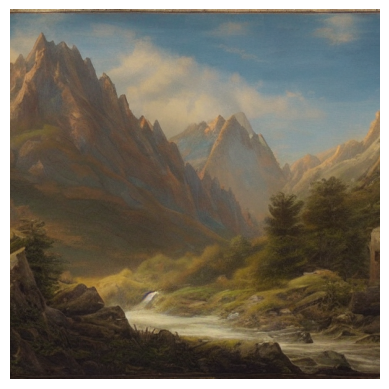

In [3]:
from diffusers import StableDiffusionPipeline
import torch
from PIL import Image
import matplotlib.pyplot as plt

model_name = 'runwayml/stable-diffusion-v1-5'
device = "mps" #if torch.cuda.is_available() else "cpu"

pipe = StableDiffusionPipeline.from_pretrained(model_name, torch_dtype=torch.float16)
pipe = pipe.to(device)

text_prompt = "a fantasy landscape with mountains and a river"  # 여기에 원하는 텍스트를 입력.

image = pipe(text_prompt).images[0]

plt.imshow(image)
plt.axis('off')
plt.show()
image.save("generated_image.png")
